In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score


In [2]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

In [4]:
datos = pd.read_excel('/content/drive/MyDrive/Datos_SI_Normalizado.xlsx')

In [5]:
features = ['MONTO_PIM', 'MONTO_CERTIFICADO', 'MONTO_COMPROMETIDO_ANUAL', 'MONTO_COMPROMETIDO', 'MONTO_DEVENGADO', 'MONTO_GIRADO']
datos = datos[features]
datos.head()

,MONTO_PIM,MONTO_CERTIFICADO,MONTO_COMPROMETIDO_ANUAL,MONTO_COMPROMETIDO,MONTO_DEVENGADO,MONTO_GIRADO
0,0.000000,0.272117,0.245611,0.004004,0.006408,0.5
1,0.000000,0.272117,0.245611,0.004004,0.006408,0.5
2,0.000000,0.272117,0.245611,0.004004,0.006408,0.5
3,0.000014,0.272117,0.245611,0.004004,0.006408,0.5
4,0.000004,0.272117,0.245611,0.004004,0.006408,0.5


In [113]:
x = datos[['MONTO_CERTIFICADO','MONTO_COMPROMETIDO']].head(1500)
x

,MONTO_CERTIFICADO,MONTO_COMPROMETIDO
0,0.272117,0.004004
1,0.272117,0.004004
2,0.272117,0.004004
3,0.272117,0.004004
4,0.272117,0.004004
...,...,...
1495,0.272117,0.004004
1496,0.272117,0.004004
1497,0.272117,0.004004
1498,0.272117,0.004004


In [114]:
y = datos['MONTO_COMPROMETIDO']
y = y.head(1000)

In [115]:
montos = x.values
montos_scaled = scale(montos)
montos_scaled

array([[-0.00248109, -0.09779506],
       [-0.06693536, -0.09779506],
       [-0.06693536, -0.04203454],
       ...,
       [-0.06693536, -0.09779506],
       [-0.06693536, -0.09575051],
       [-0.06263841, -0.09779506]])

In [116]:
modelo_hclust_complete = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'complete',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_complete.fit(X=montos_scaled)
modelo_hclust_average = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_average.fit(X=montos_scaled)

modelo_hclust_ward = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
modelo_hclust_ward.fit(X=montos_scaled)

AgglomerativeClustering(distance_threshold=0, metric='euclidean',
                        n_clusters=None)

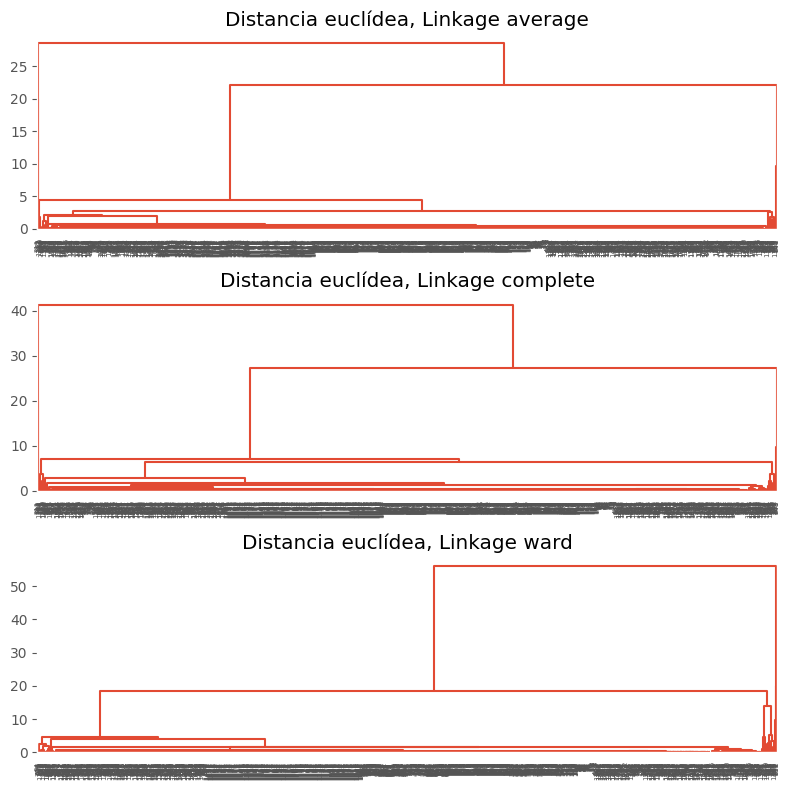

In [117]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
plot_dendrogram(modelo_hclust_average, color_threshold=0, ax=axs[0])
axs[0].set_title("Distancia euclídea, Linkage average")
plot_dendrogram(modelo_hclust_complete, color_threshold=0, ax=axs[1])
axs[1].set_title("Distancia euclídea, Linkage complete")
plot_dendrogram(modelo_hclust_ward, color_threshold=0, ax=axs[2])
axs[2].set_title("Distancia euclídea, Linkage ward")
plt.tight_layout();

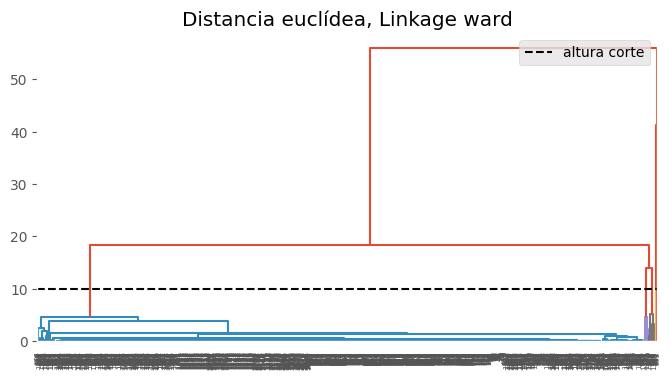

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
altura_corte = 10
plot_dendrogram(modelo_hclust_ward, color_threshold=altura_corte, ax=ax)
ax.set_title("Distancia euclídea, Linkage ward")
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
ax.legend();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

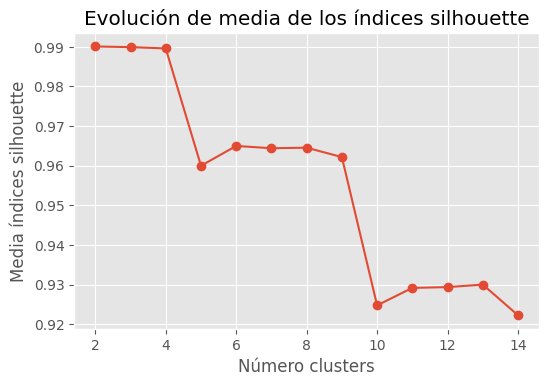

In [120]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(montos_scaled)
    silhouette_avg = silhouette_score(montos_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [121]:
modelo_hclust_ward = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'ward',
                            n_clusters = 1,
                            compute_distances = True
                     )
modelo_hclust_ward.fit(X=montos_scaled)

AgglomerativeClustering(compute_distances=True, metric='euclidean',
                        n_clusters=1)

In [122]:
label = modelo_hclust_ward.labels_
label

array([0, 0, 0, ..., 0, 0, 0])